In [726]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [727]:
#read csv file
home_df = pd.read_csv("nashville_dataset.csv")
home_df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,0,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,0,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,1,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,0,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,0,2.0,1.0,0.0,Under


In [728]:
#number of datapoints
print("Number of datapoints:", len(home_df))

Number of datapoints: 22651


In [729]:
#dataframe info
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [730]:
#Duplicate Check
home_df.loc[home_df.duplicated()]

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value


In [731]:
#Dropping constant and irrelevant features
home_df.drop(['Unnamed: 0','Parcel ID','Property Address','Suite/ Condo   #','Legal Reference'], axis=1, inplace=True)

In [732]:
#filtering out properties outside of Nashville & Stae TN
home_df = home_df[(home_df['Property City'] == 'NASHVILLE')]
home_df = home_df[(home_df['City'] == 'NASHVILLE')]

In [733]:
#Dropping Sale Date,City and State since after filtering only NASHVILLE, TN
home_df['saleyear'] = pd.DatetimeIndex(home_df['Sale Date']).year
home_df.drop(['Property City','City','State','Sale Date'], axis=1, inplace=True)
home_df

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,saleyear
0,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,0,2.0,1.0,0.0,Over,2013
1,SINGLE FAMILY,No,No,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,0,3.0,2.0,1.0,Over,2013
2,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,1,4.0,2.0,0.0,Under,2013
3,SINGLE FAMILY,No,No,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,0,2.0,1.0,0.0,Under,2013
4,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,0,2.0,1.0,0.0,Under,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,SINGLE FAMILY,No,No,0.25,URBAN SERVICES DISTRICT,6028,24000,104700,1911.00000,CRAWL,1972,BRICK,0,3.0,2.0,0.0,Under,2016
22634,SINGLE FAMILY,No,No,0.25,URBAN SERVICES DISTRICT,4291,22500,107300,1888.00000,CRAWL,1987,FRAME,0,3.0,3.0,0.0,Over,2016
22635,SINGLE FAMILY,No,No,0.24,URBAN SERVICES DISTRICT,4291,22500,97700,1912.00000,CRAWL,1989,FRAME,0,3.0,3.0,0.0,Over,2016
22649,SINGLE FAMILY,No,No,0.15,URBAN SERVICES DISTRICT,126,40000,204100,1637.00000,CRAWL,2004,FRAME,1,3.0,2.0,1.0,Over,2016


In [734]:
#Null Check
home_df = home_df.dropna()
home_df.isnull().sum()

Land Use                             0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
saleyear                             0
dtype: int64

C:\Users\lokes\AppData\Local\Temp\ipykernel_9180\3786397089.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=home_df["Acreage"])
C:\Users\lokes\AppData\Local\Temp\ipykernel_9180\3786397089.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=home_df["Land Value"])
C:\Users\lokes\AppData\

<AxesSubplot: title={'center': 'Sale Price Compared To Value - Balance Check'}, xlabel='Sale Price Compared To Value', ylabel='count'>

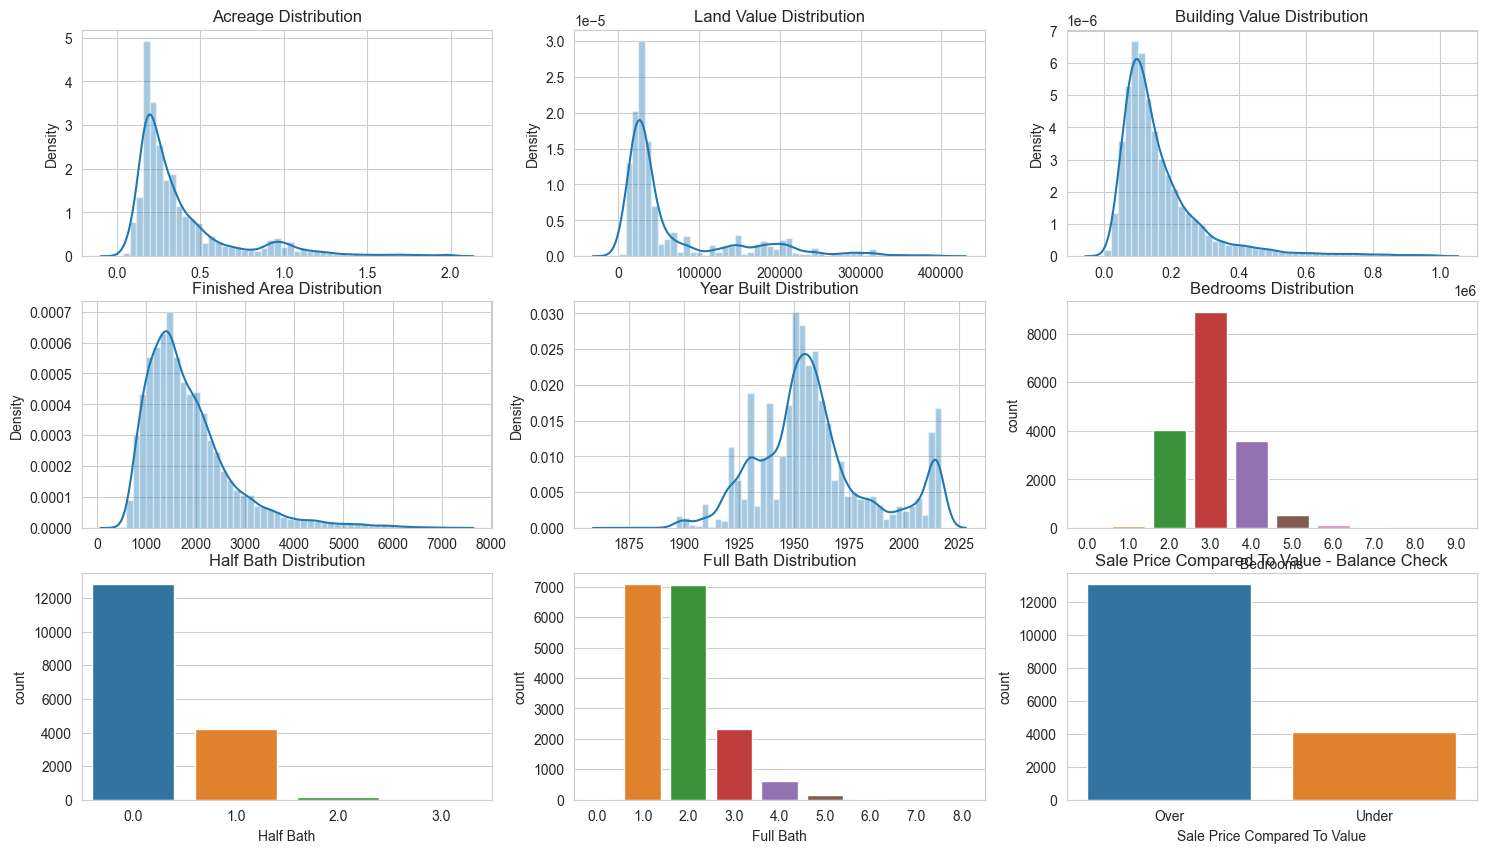

In [735]:
#EDA & Data Cleaning
plt.figure(figsize=(18,10))


home_df = home_df[(home_df['Acreage'] <= 2)]

#Acreage Distribution
plt.subplot(3,3,1)
plt.title('Acreage Distribution')
sns.distplot(x=home_df["Acreage"])


home_df = home_df[(home_df['Land Value'] <= 400000)]
#Land Value Distribution
plt.subplot(3,3,2)
plt.title('Land Value Distribution')
sns.distplot(x=home_df["Land Value"])

home_df = home_df[(home_df['Building Value'] <= 1000000)]
#Building Value Distribution
plt.subplot(3,3,3)
plt.title('Building Value Distribution')
sns.distplot(x=home_df["Building Value"])

home_df = home_df[(home_df['Finished Area'] <= 7500)]
#Finished Area Distribution
plt.subplot(3,3,4)
plt.title('Finished Area Distribution')
sns.distplot(x=home_df["Finished Area"])

#Year Built Distribution
plt.subplot(3,3,5)
plt.title('Year Built Distribution')
sns.distplot(x=home_df["Year Built"])

#Bedrooms  Distribution
plt.subplot(3,3,6)
plt.title('Bedrooms Distribution')
sns.countplot(x=home_df["Bedrooms"])

#Half Bath  Distribution
plt.subplot(3,3,7)
plt.title('Half Bath Distribution')
sns.countplot(x=home_df["Half Bath"])

#Full Bath  Distribution
plt.subplot(3,3,8)
plt.title('Full Bath Distribution')
sns.countplot(x=home_df["Full Bath"])

#Balance Check
plt.subplot(3,3,9)
plt.title('Sale Price Compared To Value - Balance Check')
sns.countplot(x=home_df["Sale Price Compared To Value"])

C:\Users\lokes\AppData\Local\Temp\ipykernel_9180\1622994217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = home_df.corr()


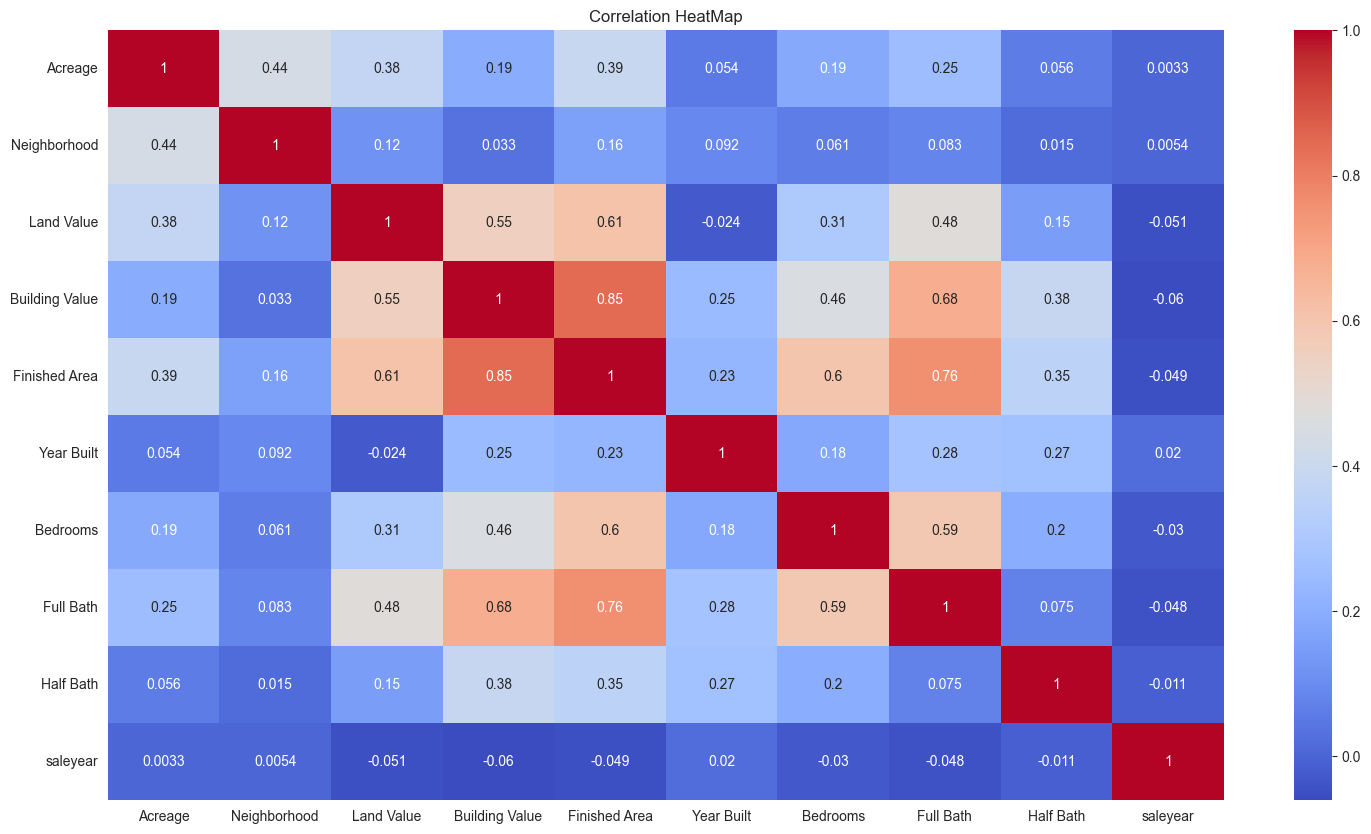

In [736]:
#CORR heatmap
cor = home_df.corr()
plt.figure(figsize = (18,10))
plt.title('Correlation HeatMap')
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

<AxesSubplot: title={'center': 'Land Value vs Valued Status'}, xlabel='Land Value', ylabel='Percent'>

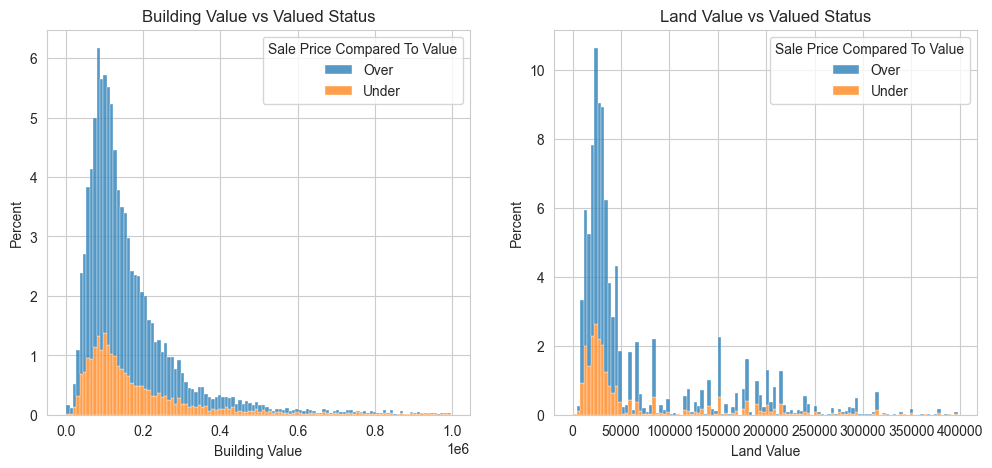

In [737]:
# response based on education
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Building Value vs Valued Status')
sns.histplot(data=home_df, x="Building Value", hue="Sale Price Compared To Value", multiple="stack", stat="percent")

plt.subplot(122)
plt.title('Land Value vs Valued Status')
sns.histplot(data=home_df, x="Land Value", hue="Sale Price Compared To Value", multiple="stack", stat="percent")

In [738]:
#encoding
map_lu = {
    "SINGLE FAMILY": 0,
    "DUPLEX": 1,
    "RESIDENTIAL COMBO/MISC": 2,
    "QUADPLEX": 3
}
map_si = {
    "No": 0,
    "Yes": 1
}
map_td = {
    "URBAN SERVICES DISTRICT": 0,
    "CITY OF BERRY HILL": 1,
    "GENERAL SERVICES DISTRICT": 2,
    "CITY OF BELLE MEADE": 3,
    "CITY OF OAK HILL": 4,
    "CITY OF FOREST HILLS": 5,
}
map_ft = {
    "PT BSMT": 0,
    "SLAB": 1,
    "FULL BSMT": 2,
    "CRAWL": 3,
    "PIERS": 4,
    "TYPICAL": 5
}
map_ew = {
    "BRICK": 0,
    "BRICK/FRAME": 1,
    "FRAME": 2,
    "FRAME/STONE": 3,
    "STONE": 4,
    "STUCCO": 5,
    "CONC BLK": 6,
    "LOG": 7,
    "METAL": 8,
}
map_tar = {
    "Over": 0,
    "Under": 1
}
map_grade = {
    "C": 0,
    "B": 1,
    "D": 2,
    "A": 3,
    "X": 4,
    "E": 5,
    "SSC": 6,
    "OFB": 7
}
home_df["Land Use"] = home_df["Land Use"].map(map_lu)
home_df["Sold As Vacant"] = home_df["Sold As Vacant"].map(map_si)
home_df["Multiple Parcels Involved in Sale"] = home_df["Multiple Parcels Involved in Sale"].map(map_si)
home_df["Tax District"] = home_df["Tax District"].map(map_td)
home_df["Foundation Type"] = home_df["Foundation Type"].map(map_ft)
home_df["Exterior Wall"] = home_df["Exterior Wall"].map(map_ew)
home_df["Sale Price Compared To Value"] = home_df["Sale Price Compared To Value"].map(map_tar)
home_df = pd.get_dummies(home_df, columns = ["Grade"])

In [739]:
#Model - log Build
X = home_df.drop(['Sale Price Compared To Value'],axis=1)
Y = home_df['Sale Price Compared To Value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [740]:
model = sm.Logit(y_train,x_train).fit()
print(model.summary())

         Current function value: 0.488915
         Iterations: 35
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                12067
Model:                                    Logit   Df Residuals:                    12043
Method:                                     MLE   Df Model:                           23
Date:                          Mon, 06 Feb 2023   Pseudo R-squ.:                  0.1166
Time:                                  23:01:35   Log-Likelihood:                -5899.7
converged:                                False   LL-Null:                       -6678.5
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Land Use          

C:\Python33\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [741]:
y_pred = model.predict(x_test)
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]
print("Model Accuracy = ", round(accuracy_score(y_test,Y_pred),3))
rc = recall_score(y_test,Y_pred, average='binary')
print("Model Recall =  ",rc)
ps = precision_score(y_test, Y_pred,average='binary')
print("Model Precision =  ",ps)

Model Accuracy =  0.777
Model Recall =   0.15296052631578946
Model Precision =   0.6038961038961039


<AxesSubplot: >

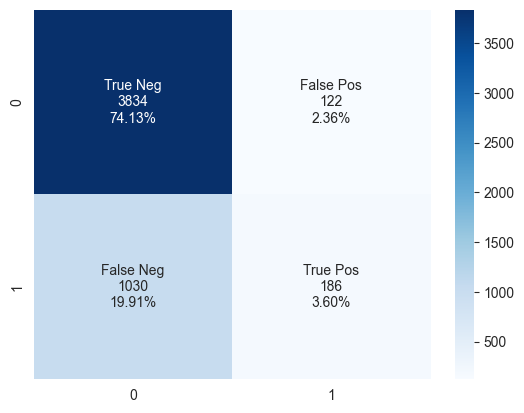

In [742]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

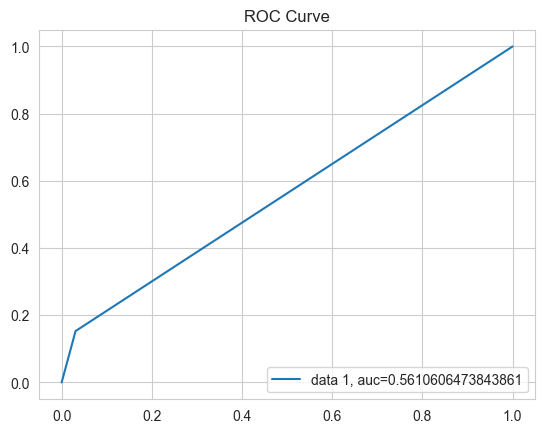

In [743]:
#ROC and AUC
auc = metrics.roc_auc_score(y_test, Y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [744]:
#Decision Tree Model
#Finding optimum number of estimators using gridsearch
# Define the parameter grid
param_grid = {
    'max_depth': range(1, 10),
    'criterion': ['gini', 'entropy'],
}

# Initialize the model
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5}
Best score:  0.779564125691719


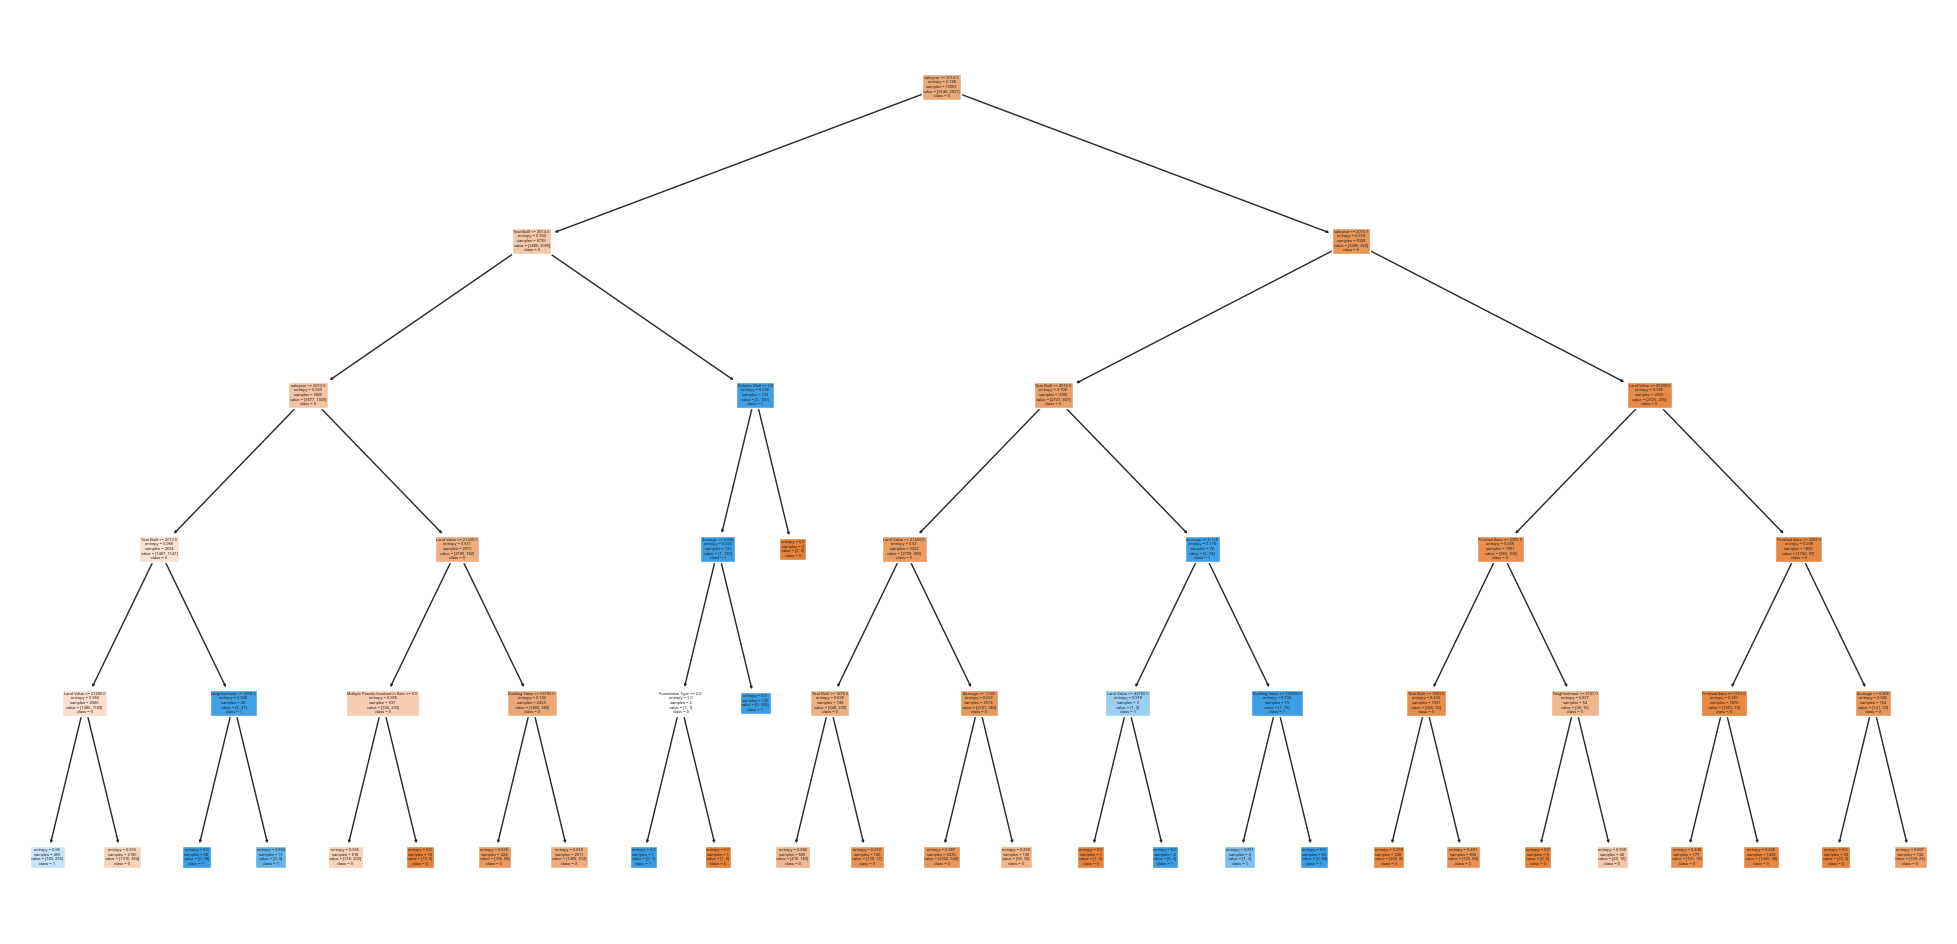

In [745]:
#decision tree model
model_tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model1 = model_tree.fit(x_train,y_train)
plt.figure(figsize=(25,12))
plot = tree.plot_tree(model1, feature_names = X.columns.values.tolist(), class_names=['0','1'],filled = True)

Land Use 0.0
Sold As Vacant 0.0
Multiple Parcels Involved in Sale 0.008586236806419331
Acreage 0.019295002650955313
Tax District 0.0
Neighborhood 0.006241369322563062
Land Value 0.07789974377438762
Building Value 0.011445661573431559
Finished Area 0.021463788801028307
Foundation Type 0.0012973901129265113
Year Built 0.2719087104205423
Exterior Wall 0.007926575643197478
Bedrooms 0.0
Full Bath 0.0
Half Bath 0.0
saleyear 0.5739355208945486
Grade_0 0.0
Grade_1 0.0
Grade_2 0.0
Grade_3 0.0
Grade_4 0.0
Grade_5 0.0
Grade_OF1  0.0
Grade_SS0  0.0


<AxesSubplot: >

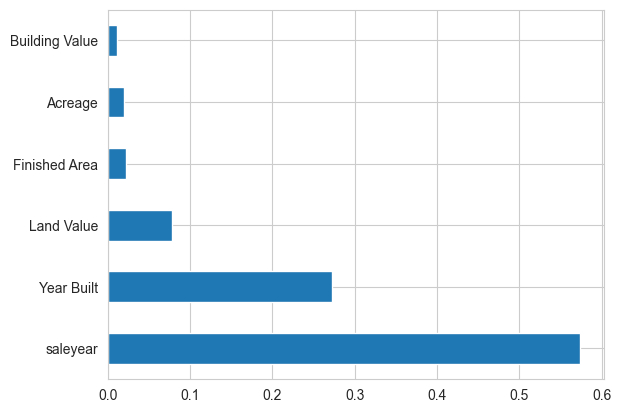

In [746]:
#significant features
features = list(x_train.columns)
for name, importance in zip(features, model1.feature_importances_):
    print(name, importance)

#impt features
(pd.Series(model1.feature_importances_, index=X.columns)
   .nlargest(6)
   .plot(kind='barh'))

In [747]:
y_pred = model1.predict(x_test)
Y_pred = y_pred
print("Model Accuracy = ", round(accuracy_score(y_test,Y_pred),3))
rc = recall_score(y_test,Y_pred, average='binary')
print("Model Recall =  ",rc)
ps = precision_score(y_test, Y_pred,average='binary')
print("Model Precision =  ",ps)

Model Accuracy =  0.791
Model Recall =   0.17763157894736842
Model Precision =   0.7297297297297297


<AxesSubplot: >

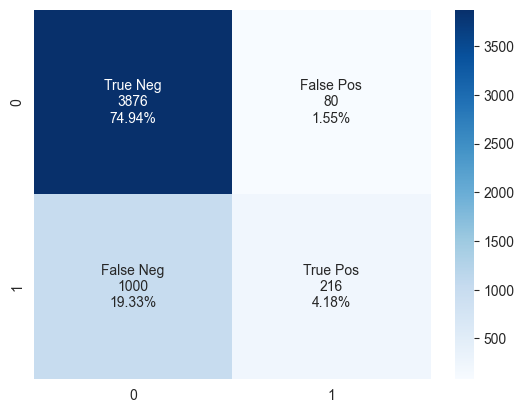

In [748]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

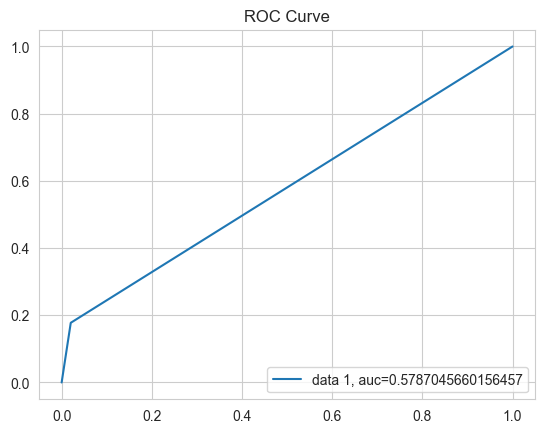

In [749]:
#ROC and AUC
auc = metrics.roc_auc_score(y_test, Y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [750]:
#Random Forest Model
#Finding optimum number of estimators using gridsearch
# Define the parameter grid
param_grid = {
    'n_estimators': range(1, 25)
}
# Initialize the model
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_estimators': 22}
Best score:  0.7750058626790606


In [751]:
rfclass = RandomForestClassifier(n_estimators= 24, random_state= 21)
rfclass.fit(x_train,y_train)
Y_pred = rfclass.predict((x_test))
print("Model Accuracy = ", round(accuracy_score(y_test,Y_pred),3))
rc = recall_score(y_test,Y_pred, average='binary')
print("Model Recall =  ",rc)
ps = precision_score(y_test, Y_pred,average='binary')
print("Model Precision =  ",ps)

Model Accuracy =  0.78
Model Recall =   0.2837171052631579
Model Precision =   0.5655737704918032


Land Use 0.009211685685799954
Sold As Vacant 0.012702051347522766
Multiple Parcels Involved in Sale 0.005123461265909348
Acreage 0.11033697136809888
Tax District 0.006310664876732059
Neighborhood 0.08318631298702941
Land Value 0.09820624863542567
Building Value 0.144206305469165
Finished Area 0.13728605713417735
Foundation Type 0.028274369820191967
Year Built 0.11863084832111427
Exterior Wall 0.02673544480249175
Bedrooms 0.03344648626420976
Full Bath 0.02557544331114819
Half Bath 0.01628901210215223
saleyear 0.12381408555702478
Grade_0 0.0070982176687862395
Grade_1 0.005289150656377851
Grade_2 0.004003433844696472
Grade_3 0.001735765054744852
Grade_4 0.0013543399888467774
Grade_5 0.0011252956106633217
Grade_OF1  5.970542891171929e-07
Grade_SS0  5.775117340195167e-05


<AxesSubplot: >

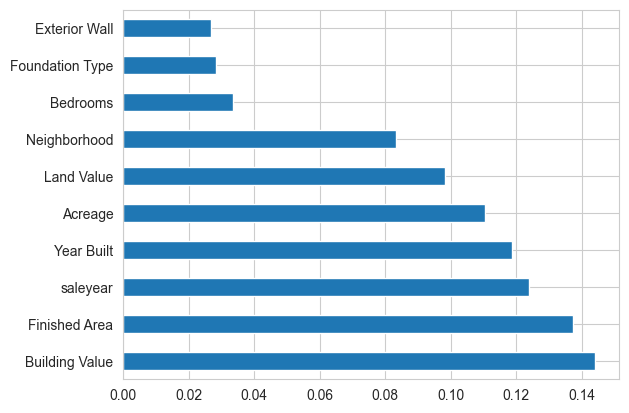

In [752]:
#significant features
features = list(x_train.columns)
for name, importance in zip(features, rfclass.feature_importances_):
    print(name, importance)

#impt features
(pd.Series(rfclass.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

<AxesSubplot: >

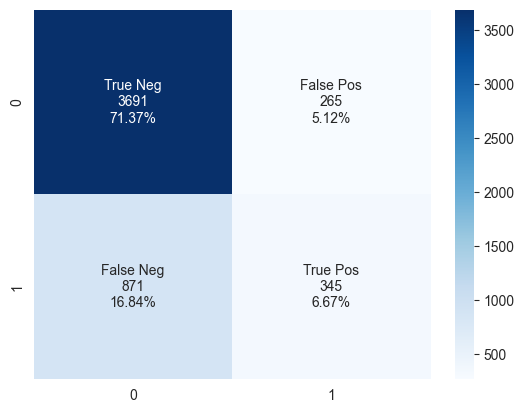

In [753]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

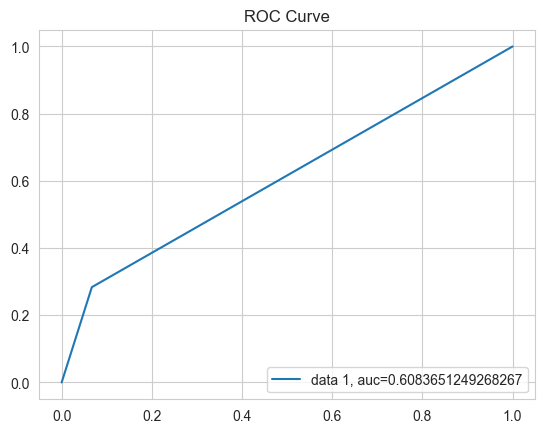

In [754]:
#ROC and AUC
auc = metrics.roc_auc_score(y_test, Y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [755]:
#Gradient Boost Model

# Define the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': range(1,25),
    'max_depth': [1,2,3],
}

# Create a GridSearchCV object for performing the hyperparameter tuning
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 3, 'n_estimators': 24}
Best cross-validation score: 0.7826303325915857


In [756]:
#GradientBoost Model

gbclass = GradientBoostingClassifier(max_depth = 3, n_estimators= 24,random_state=33)
gbclass.fit(x_train,y_train)
Y_pred = gbclass.predict(x_test)
print("Model Accuracy = ", round(accuracy_score(y_test,Y_pred),3))
rc = recall_score(y_test,Y_pred, average='binary')
print("Model Recall =  ",rc)
ps = precision_score(y_test, Y_pred,average='binary')
print("Model Precision =  ",ps)

Model Accuracy =  0.791
Model Recall =   0.13157894736842105
Model Precision =   0.8743169398907104


Land Use 0.0014734318496743943
Sold As Vacant 0.02350151343414909
Multiple Parcels Involved in Sale 0.0053120588213908205
Acreage 0.001621197993534672
Tax District 0.0005672560232572302
Neighborhood 0.0018001915156269834
Land Value 0.07907164265457897
Building Value 0.033832403591259184
Finished Area 0.0055894803923208745
Foundation Type 0.0
Year Built 0.26255142469079873
Exterior Wall 0.004093087028480975
Bedrooms 0.00044274351141622496
Full Bath 0.0002316768944371781
Half Bath 0.0
saleyear 0.5740791517440513
Grade_0 0.0026467916270313196
Grade_1 0.0
Grade_2 0.0
Grade_3 0.0003795274788779154
Grade_4 0.0028064207491141457
Grade_5 0.0
Grade_OF1  0.0
Grade_SS0  0.0


<AxesSubplot: >

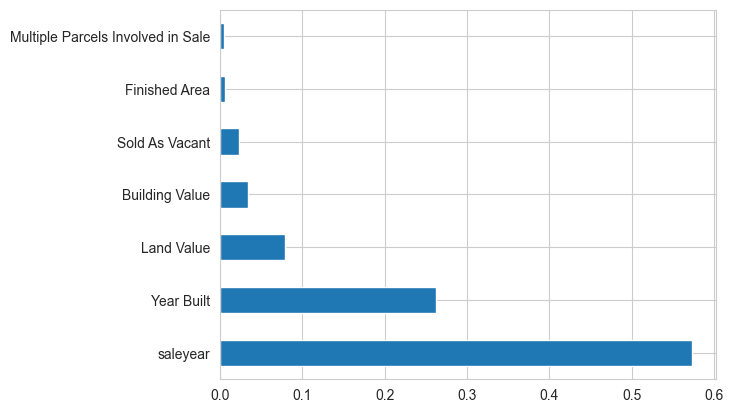

In [757]:
#significant features
features = list(x_train.columns)
for name, importance in zip(features, gbclass.feature_importances_):
    print(name, importance)

#impt features
(pd.Series(gbclass.feature_importances_, index=X.columns)
   .nlargest(7)
   .plot(kind='barh'))

<AxesSubplot: >

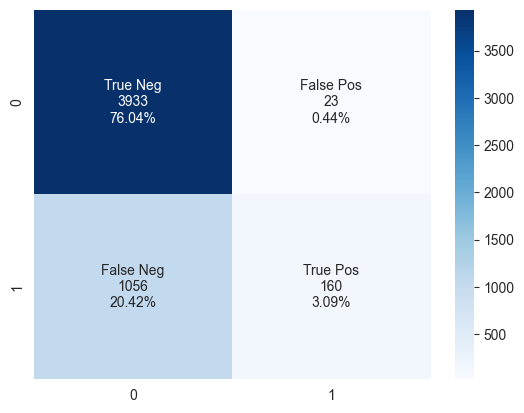

In [758]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, Y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

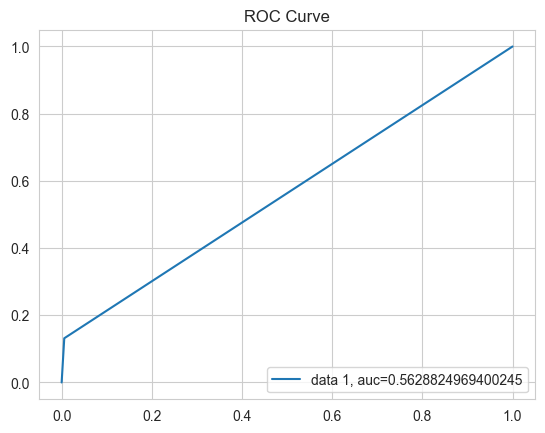

In [759]:
#ROC and AUC
auc = metrics.roc_auc_score(y_test, Y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()